In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import plotly.express as px

In [ ]:
from utils_plotting import plot_value_counts_with_avg

In [3]:
df = pd.read_csv("data/original/superset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360493 entries, 0 to 360492
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   text                          360492 non-null  object 
 1   labels                        360493 non-null  float64
 2   source                        360493 non-null  object 
 3   dataset                       360493 non-null  object 
 4   nb_annotators                 351306 non-null  object 
 5   post_author_country_location  360493 non-null  object 
 6   word_count                    360493 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 19.3+ MB


In [5]:
df.duplicated().sum()

1622

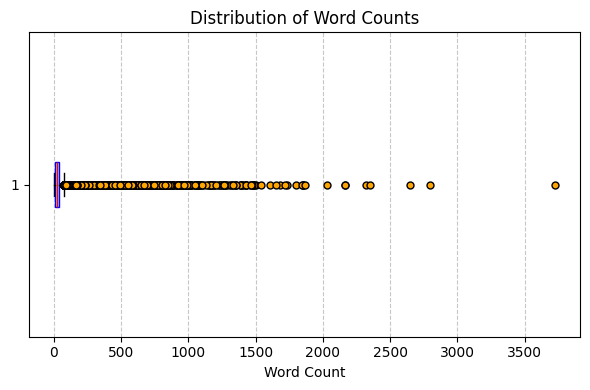

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Set figure size
plt.boxplot(df["word_count"].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
superset_max_text_length = 60
(df["word_count"] > superset_max_text_length).sum()

28274

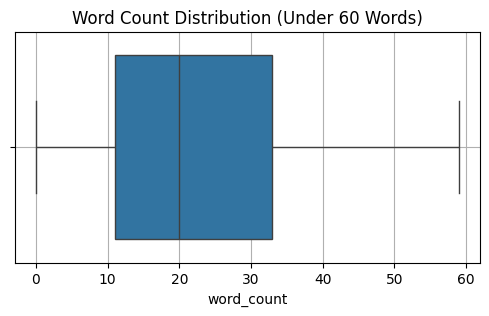

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.boxplot(data=df[df["word_count"] < superset_max_text_length], x="word_count")
plt.title("Word Count Distribution (Under 60 Words)")
plt.xlabel("word_count")
plt.grid(True)
plt.show()

In [9]:
df[df["word_count"] < superset_max_text_length]["labels"].value_counts(normalize=True)

labels
0.0    0.733379
1.0    0.266621
Name: proportion, dtype: float64

In [10]:
# # Register tqdm for pandas
# tqdm.pandas()


# # Function to count words using NLTK with error handling
# def count_words_nltk(text):
#     if not isinstance(text, str):
#         return 0  # Return zero word count for non-string inputs
#     words = word_tokenize(text)
#     return len(words)

# # Apply the function to each tweet with a progress bar
# df['word_count'] = df['text'].progress_apply(count_words_nltk)

In [11]:
# df.to_csv("data/superset.csv", index=False)

In [12]:
# fig = px.violin(df, x='word_count', orientation='h', box=True, points="all",
#                 title="Distribution of Tweet Lengths",
#                 labels={'word_count': 'Number of Words'})
# fig.update_layout(xaxis_title='Number of Words', yaxis_title='')
# # fig.show()

In [13]:
# # fig.write_html("Superset_violin.html")
# fig.write_image("Superset_violin.png")

In [15]:
plot_value_counts_with_avg(df, 'source')

In [16]:
plot_value_counts_with_avg(df, 'dataset')

### 🧠 **Hate Speech & Offensive Content Dataset Comparison** *(with emoji power!)*

| **Dataset**              | **Focus Area**                            | **Type of Hate**                        | **Notes**                                                                 |
|--------------------------|-------------------------------------------|-----------------------------------------|---------------------------------------------------------------------------|
| **CONAN 🧘‍♂️🗣️**            | Counterspeech & rebuttals                | Anti-hate replies                       | Teach your model to fight hate with calm counterspeech.                   |
| **fox_news 🦊📰**           | Media commentary                         | Political bias / implied hate           | Includes provocative language; good for detecting polarizing narratives. |
| **ETHOS 💬⚖️**              | General hate speech detection            | Multi-label (race, gender, etc.)        | Covers a broad spectrum of hate types.                                   |
| **are_you_a_racist ❓🧍🏾‍♂️🧍🏼‍♀️** | Bias via Q&A format                    | Racism                                  | Satirical, indirect, and revealing bias.                                  |
| **anatomy_online_hate 🫀🔥** | Structured hate types                   | Threats, insults, dehumanization        | Breaks down hate into its toxic building blocks.                          |
| **benchmark 🎯🧪**          | Unified test suite                       | Multiple hate types                     | A performance benchmark across hate classes.                             |
| **GHC 🧢💣**                 | Gab Hate Corpus                          | Extremist hate                          | From Gab—where moderation fears to tread.                                |
| **MLMA 🌍👩🏽🗯️**             | Multilingual misogyny                   | Gender-based abuse                      | Multilingual, multi-toxic.                                               |
| **hatemoji-build 😂💀**     | Emojis + hate                           | Sarcasm, hidden hate                    | Ideal for BERTweet-style emoji-rich text.                                |
| **call_me_sexist 🙄💅**     | Casual sexism detection                  | Subtle & implicit sexism                | Trains your model to spot "playful" misogyny.                            |
| **davidson 🐦👊**           | Classic Twitter hate                    | Hate, Offensive, Neither                | A staple—great for foundational training.                                |
| **east_asian 🌏😠**         | Anti-Asian sentiment                    | Race-based hate                         | Especially relevant post-COVID xenophobia.                               |
| **learning from the worst 🧨💣** | Extreme toxicity                     | Worst-case hate examples                | Pushes your model’s boundaries.                                          |
| **hasoc 🌐📢**              | Multilingual offensive content           | Region-based hate (India, Germany, etc.)| Good for international generalization.                                   |
| **hateful_symbols 🛑🧿**     | Symbol-based hate                       | Emojis, icons, visual cues              | Teaches your model that hate wears masks.                                |
| **melsherief 👩🏽‍🏫📊**       | Annotated offensive content             | Broad social hate                       | Strong for training fair & explainable classifiers.                      |
| **compliment_sexist 🌸🤦‍♀️** | Masked sexism                           | Implicit gender bias                    | Trains your model to read between the backhanded lines.                  |
| **white_supremacy 👨🏻‍✈️🚫**   | Ideological hate                       | Nationalist/Extremist content           | A must-have for detecting radicalization.                                |
| **online-misogyny 🚺💢**     | Women-targeted abuse                   | Misogyny                                | Direct and indirect attacks on women.                                    |
| **Parler 📲🎙️**            | Platform-based hate                    | Right-wing/conspiratorial hate          | Rich with unmoderated, polarized content.                                |
| **toraman 🇹🇷🧠**            | Turkish hate speech                    | Language-specific abuse                 | Boosts multi-lingual resilience.                                         |
| **CAD 💬🤖**                | Civility detection                     | Insults, aggression, toxic tone         | Civility rating—adds gradation to "gray zone" content.                   |
| **measuring-hate-speech 📈⚖️** | Scaled hate levels                  | Offensive → hate scale                  | Labels hate on a continuum.                                              |
| **EDOS 👩‍💼🧠**              | Explainable sexism detection            | Explicit/Implicit sexism                | Labels intent + directs/indirects.                                       |
| **hatexplain 🧠🗯️✅**         | Hate + human rationale                 | Hate/Offensive/Normal + rationale       | Explainable hate — ML meets common sense.                                |

In [27]:
df["dataset"].unique()

array(['CONAN', 'fox_news', 'ETHOS', 'are_you_a_racist',
       'anatomy_online_hate', 'benchmark', 'GHC', 'MLMA',
       'hatemoji-build', 'call_me_sexist', 'davidson', 'east_asian',
       'learning from the worst', 'hasoc', 'hateful_symbols',
       'melsherief', 'compliment_sexist', 'white_supremacy',
       'online-misogyny', 'Parler', 'toraman', 'CAD',
       'measuring-hate-speech', 'EDOS', 'hatexplain'], dtype=object)

In [17]:
plot_value_counts_with_avg(df, 'nb_annotators')

In [18]:
plot_value_counts_with_avg(df, 'post_author_country_location')

# annotation of whether the post is hateful (== 1) or not (==0).

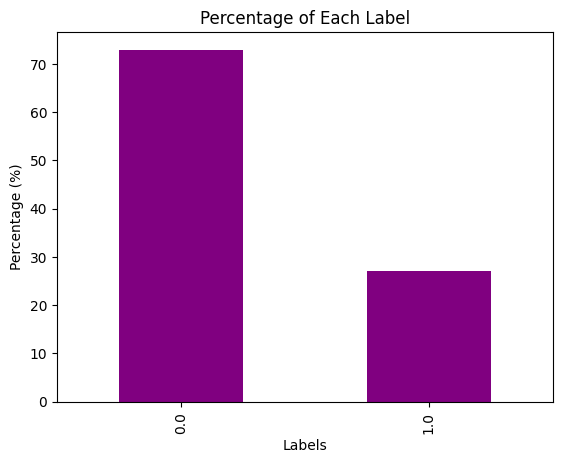

In [19]:
# Calculating the normalized value counts for the 'labels' column
normalized_counts = df["labels"].value_counts(normalize=True) * 100  # Convert to percentage

# Plotting the normalized counts
normalized_counts.plot(kind="bar", color='purple')  # Adjust color as needed

# Adding titles and labels
plt.title('Percentage of Each Label')
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')

# Display the plot
plt.show()

## Sample Trial

In [20]:
dff = pd.read_csv("data/superset_sample.csv")

In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    35000 non-null  object
 1   labels  35000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 547.0+ KB


In [22]:
# dff["source"].value_counts().plot(kind="bar")

In [23]:
dff["labels"].shape

(35000,)